In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt
import math

In [2]:
G={
    1:[2,3,5,7],
    2:[1],
    3:[1],
    4:[6,7],
    6:[4,5],
    7:[1,4],
    5:[1,6],
}

In [3]:
#随机初始化
emb=np.random.randn(7,2)

In [4]:
for epoch in range(10000):
    for i in range(7):
        node=i
        # 随机路径
        for path in range(random.randint(1,3)):
            node=int(np.random.choice(G[node+1]))-1
        # 正例
        # score是根据loss求导得到的,0.01为步长,后面的是梯度
        score=0.01*(1.0-1.0/(1+math.exp(-emb[i,:].dot(emb[node,:]))))
        temp=score*emb[i,:]
        emb[i,:]+=score*emb[node,:]
        emb[node,:]+=temp
        # 负例
        neg=random.randint(0,6)
        score=0.01*(-1.0/(1+math.exp(-emb[i,:].dot(emb[neg,:]))))
        temp=score*emb[i,:]
        emb[i,:]+=score*emb[neg,:]
        emb[neg,:]+=temp

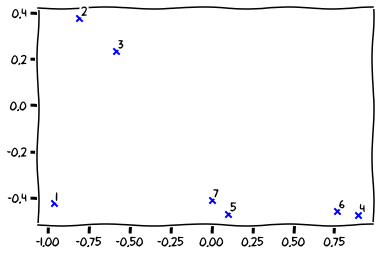

In [5]:
txt = [str(i) for i in range(1,8)]
plt.rcParams['axes.unicode_minus'] = False 
with plt.xkcd():
    plt.scatter(emb[:,0],emb[:,1],marker='x',color='b',s=40,label='1')
    for i in range(7):
        plt.annotate(txt[i],xy=(emb[i,0],emb[i,1]),xytext=(emb[i,0]+0.01,emb[i,1]+0.01))
    plt.savefig("1.svg")